# Tarea 7 & 8: Procesamiento y Clasificación de Datos
# Alumnos: Alexis Hernandez Morales & Eduardo Alan Hernandez Villasana


In [1]:
!pip install dtw-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.7/801.7 kB 8.7 MB/s eta 0:00:00


In [2]:
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [5]:
y, sr = librosa.load('spring-mood-wav-212731.wav')
x, st = librosa.load('hard-phonk-master-wav-262571.wav')

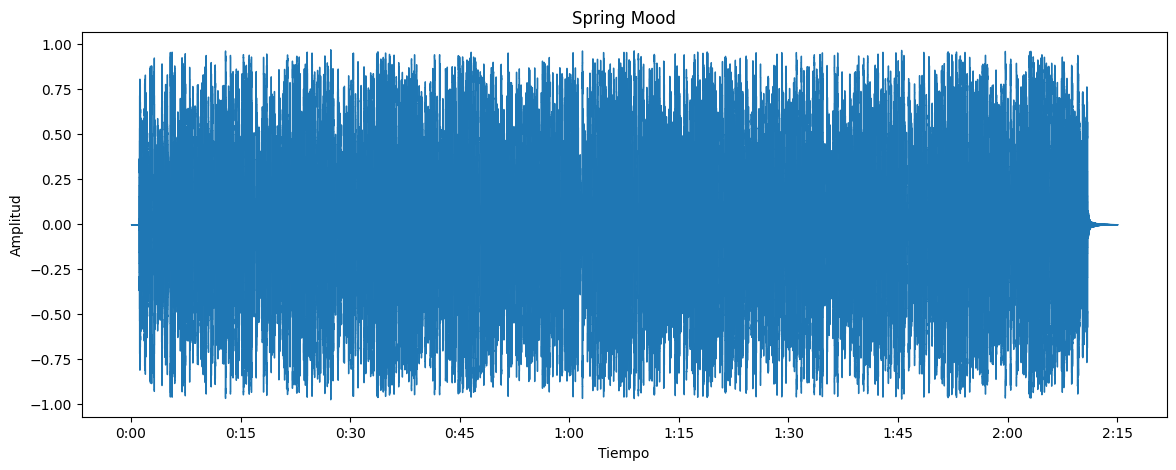

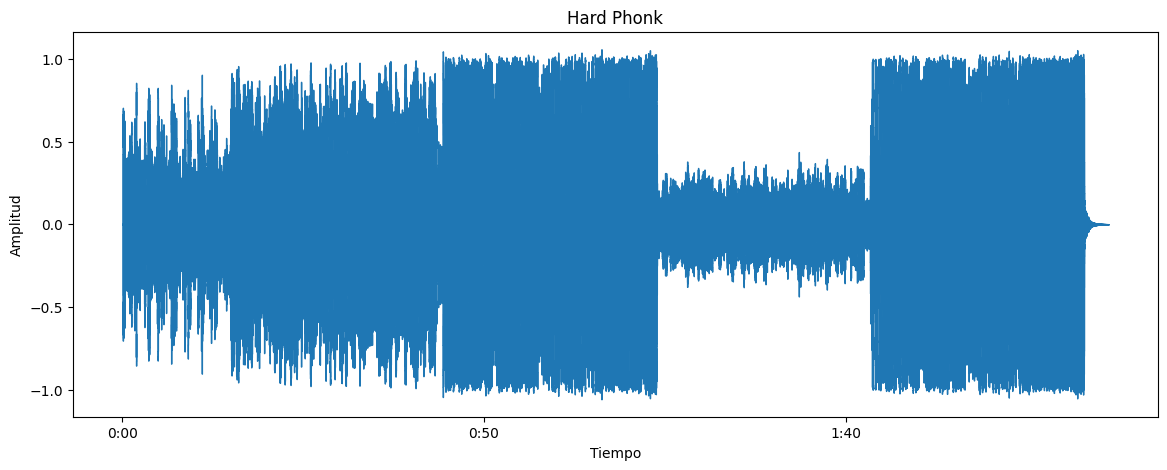

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Spring Mood')


plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=st)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Hard Phonk')
plt.show()

Se puede apreciar una amplitud constante de Spring Mood a diferencia de Hard Phonk en donde varia mucho debido a los cambios de ritmo que tiene, con momentos muy ruidosos y otros no tanto.

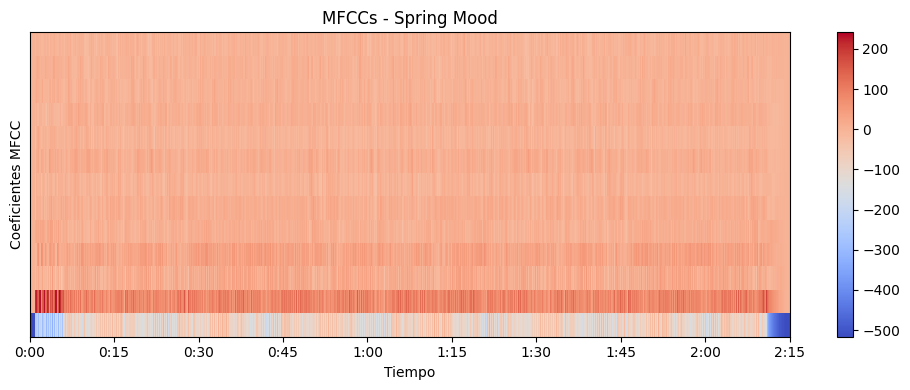

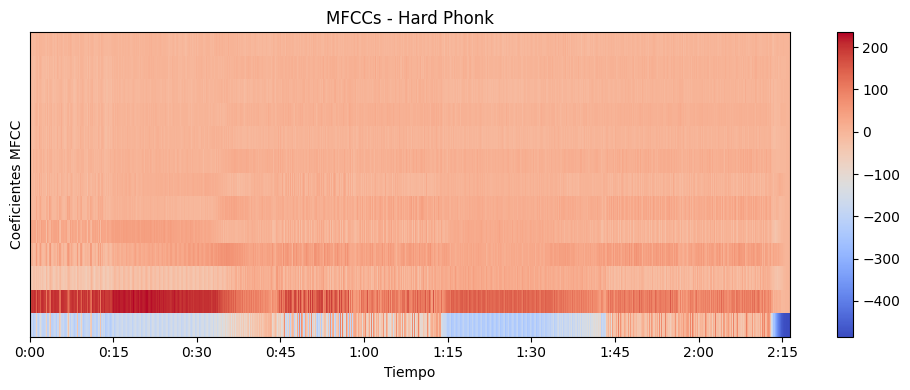

In [7]:
# Calcular MFCCs
mfccs_y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_x = librosa.feature.mfcc(y=x, sr=st, n_mfcc=13)

# Visualizar MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_y, sr=sr, x_axis='time')
plt.xlabel('Tiempo')
plt.ylabel('Coeficientes MFCC')
plt.colorbar()
plt.title('MFCCs - Spring Mood')
plt.tight_layout()

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_x, sr=st, x_axis='time')
plt.xlabel('Tiempo')
plt.ylabel('Coeficientes MFCC')
plt.colorbar()
plt.title('MFCCs - Hard Phonk')
plt.tight_layout()

plt.show()

Notamos que en Spring Mood se percibe con mayor potencia en frecuencias medias, donde no son muy altas, por otro lado en Hard Phonk el caso se da con mayor poder en frecuencias muy altas.

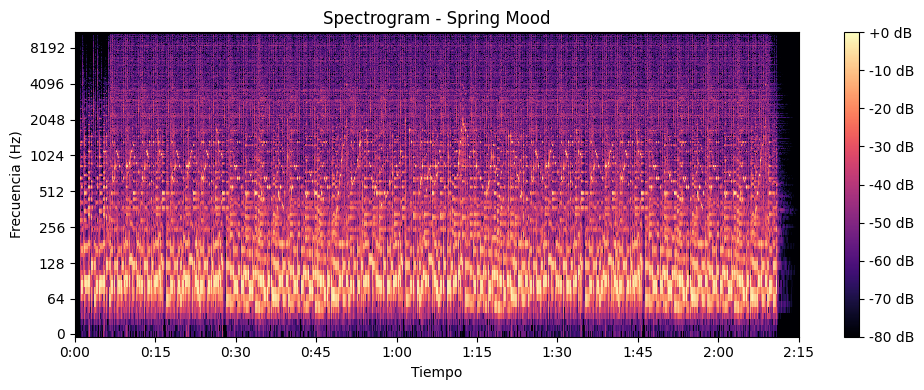

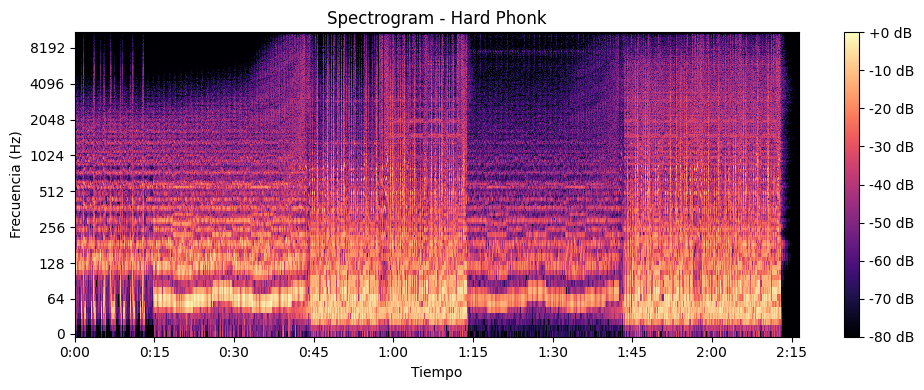

In [8]:
# Calcular el espectrograma de la señal de audio
D_y = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
D_x = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)

# Visualizar espectogramas
plt.figure(figsize=(10, 4))
librosa.display.specshow(D_y, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram - Spring Mood')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia (Hz)')
plt.tight_layout()

plt.figure(figsize=(10, 4))
librosa.display.specshow(D_x, sr=st, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram - Hard Phonk')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia (Hz)')
plt.tight_layout()

plt.show()


Ahora se observa en Spring Mood una constancia en los graves, en Hard Phonk se da un caso distinto, siendo que hay cambios notorios a través del tiempo con una tendencia a los graves.

In [9]:
frequencies_y = librosa.fft_frequencies(sr=sr)
frequencies_x = librosa.fft_frequencies(sr=st)

In [10]:
# Conversión a tiempo de las frecuencias de muestreo
times_y = librosa.frames_to_time(np.arange(D_y.shape[1]), sr=sr)
times_x = librosa.frames_to_time(np.arange(D_x.shape[1]), sr=st)

# Sumar las amplitudes a lo largo del tiempo para cada frecuencia
sum_amplitudes_y = np.sum(D_y, axis=1)
sum_amplitudes_x = np.sum(D_x, axis=1)

# Seleccionar las 10 frecuencias más representativas
top_n = 10
top_indices_y = np.argsort(sum_amplitudes_y)[-top_n:][::-1]
top_frequencies_y = frequencies_y[top_indices_y]
top_amplitudes_y = sum_amplitudes_y[top_indices_y]

top_indices_x = np.argsort(sum_amplitudes_x)[-top_n:][::-1]
top_frequencies_x = frequencies_x[top_indices_x]
top_amplitudes_x = sum_amplitudes_x[top_indices_x]

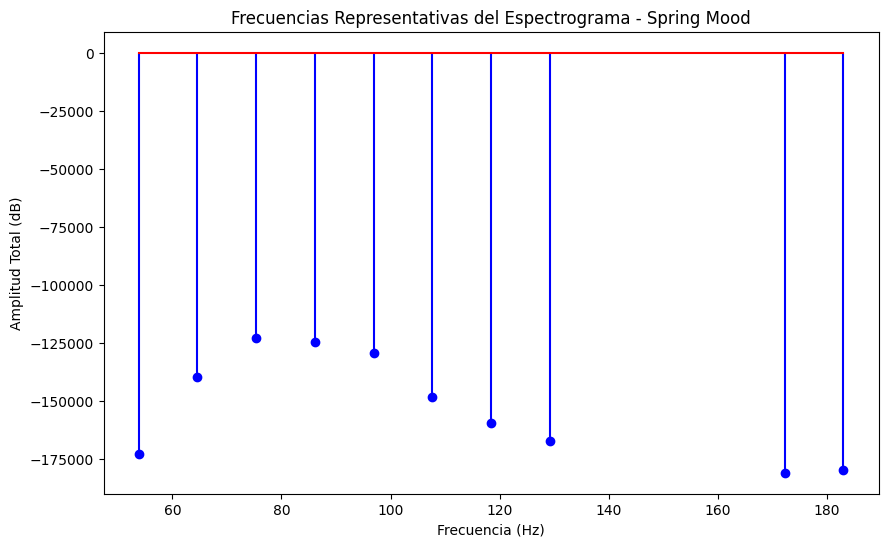

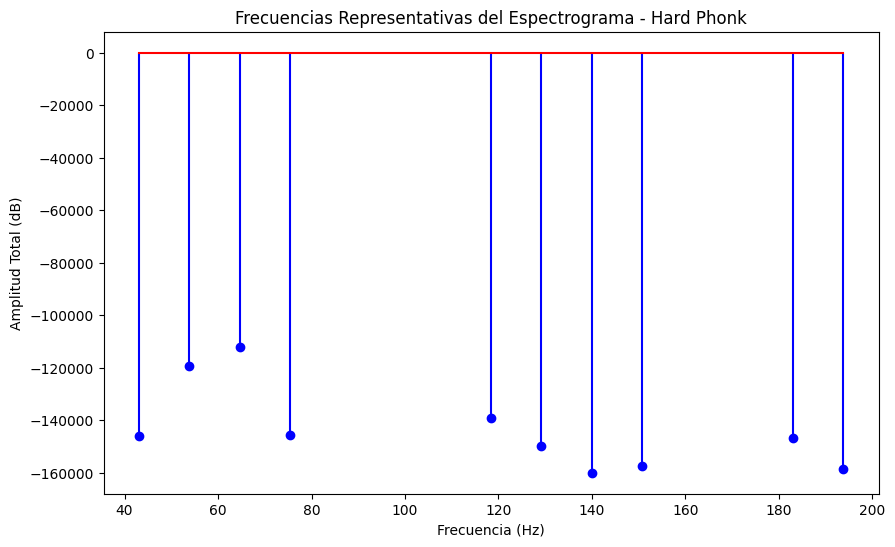

In [11]:
# Visualizar las frecuencias representativas como líneas
plt.figure(figsize=(10, 6))
plt.stem(top_frequencies_y, top_amplitudes_y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Frecuencias Representativas del Espectrograma - Spring Mood')

plt.figure(figsize=(10, 6))
plt.stem(top_frequencies_x, top_amplitudes_x, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Frecuencias Representativas del Espectrograma - Hard Phonk')

plt.show()

Para Spring Mood las frecuencias más importantes van desde 55 a 185 hercios y las amplitudes de onda entre los -125000 y los -175000. Para Hard Phonk las frecuencias más importantes van desde 45 a 195 hercios y las amplitudes de onda entre los -110000 y los -160000.

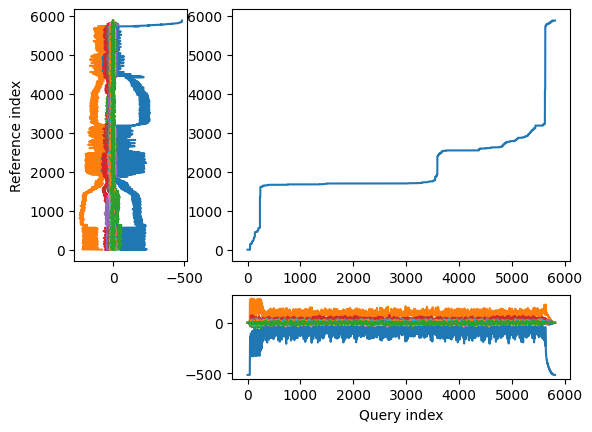

In [12]:
#Dynamic Time Warping
alignment = dtw(mfccs_y.T, mfccs_x.T, keep_internals=True)
alignment.plot(type="threeway")
plt.show()

Se pudieron notar diferencias en donde el Hard Phonk resulto ser más inconsitente, con variaciones aunque manteniendo sus bajos, a diferencia de Spring Mood con una mayor constancia y de igual manera con bajos pero en menor intensidad.